In [1]:
%matplotlib inline
import matplotlib.pylab as plt
from math import *
import numpy as np

In [2]:
k_c = 0.87
k_f = 0.026

c_c = 837.36 
c_f = 1000

rho_c = 2400
rho_f = 30 

T_g = 10+273
Q_c = 100

T_e = 25+273
T_f_0 = 10+273
T_c_0 = 10+273

L_c = 0.1
L_f = 0.05

h = 1.3

A = 36

delta_t = 10000  # sec
end_time = 500000

In [3]:
K = A*np.array([[1/A, 0, 0],
                [-k_f/L_f, k_f/L_f+k_c/L_c, -k_c/L_c],
                [0, -k_c/L_c, k_c/L_c+h]])

R = np.array([T_g,
              (A*Q_c*L_c)/2,
              (A*Q_c*L_c)/2+A*h*T_e])


C = 0.5*A*np.diag([rho_f*c_f*L_f, rho_f*c_f*L_f+rho_c*c_c*L_c, rho_c*c_c*L_c])

ss_solution = np.linalg.inv(K) @ R
print(ss_solution)

[283.         298.93882495 299.31677771]


In [4]:
C_inv = np.linalg.inv(C)

T_0 = np.array([T_f_0, T_f_0, T_c_0])

time = np.arange(0.0, end_time, delta_t)

transient_solution = []

transient_solution.append(T_0)

for t in time[1:]:
    r_bar = (C-delta_t*K) @ transient_solution[-1] + delta_t*R
    transient_solution.append( C_inv @ r_bar)
    
transient_solution = np.array(transient_solution)
    

Text(0.5, 1.0, 'Temperature vs. Time')

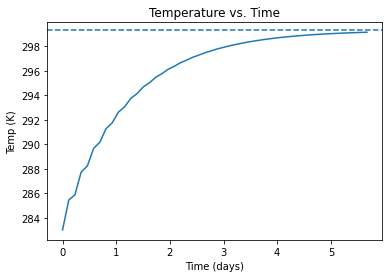

In [5]:
plt.plot(time*(1/(60*60*24)),transient_solution[:,2])
plt.axhline(ss_solution[2],linestyle='--')

plt.xlabel('Time (days)')
plt.ylabel('Temp (K)')
plt.title('Temperature vs. Time')